# Assignment: Trees

## Do two questions in total: "Q1+Q2" or "Q1+Q3"

`! git clone https://github.com/ds3001f25/linear_models_assignment.git`

**Q1.** Please answer the following questions in your own words.
1. Why is the Gini a good loss function for categorical target variables? 
2. Why do trees tend to overfit, and how can this tendency be constrained? 
3. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates. 
4. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?
5. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Q1. Responses
1. The Gini is a good loss function for categorical target variables because it describes how mixed (impure) elements from a node are. It is also simpler, and easier to compute compared to entropy. It directly measures the purity.
2. The tree often splits until it can't, are greedy, and are very sensitive to noise, and so it tends to overfit the data. To prevent this you can impose a limit on the depth of the tree, impose a lower bound on the impurity that can appear at a terminal node, or impose a limit on how few cases can appear at a terminal node.
3. This is false. The reason why is that trees can handle numeric data, especially nonlinear data. It can split a continuous variable easily at a number.
4. Besides the fact that it is definitely less difficult computationally, avoiding more than two branches helps lessen overfitting, is easier to use and understand, and allows for the use of the greedy algorithm.
5. Overfitting: a really high training accuracy and low test accuracy, a lot of leaves, complicated or strange splits. Underfitting: low number of leaves, few levels on the tree (shallow), high training and test error. 

**Q2.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy? 

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q3.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$. 

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

In [6]:
#Q3

#3.1

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("./data/corporate_ratings.csv")

df

df.head()

# 2029 observations, 31 variables

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,11/27/2015,Consumer Durables,0.945894,0.426395,0.099690,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2/13/2014,Consumer Durables,1.033559,0.498234,0.203120,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846
2,BBB,Whirlpool Corporation,WHR,Fitch Ratings,3/6/2015,Consumer Durables,0.963703,0.451505,0.122099,50.841385,...,0.214529,0.513185,9.693487,13.103448,4.094575,0.044334,10.491970,18.888889,0.074426,3.483510
3,BBB,Whirlpool Corporation,WHR,Fitch Ratings,6/15/2012,Consumer Durables,1.019851,0.510402,0.176116,41.161738,...,1.816667,-0.147170,-1.015625,14.440104,3.630950,-0.012858,4.080741,6.901042,0.028394,4.581150
4,BBB,Whirlpool Corporation,WHR,Standard & Poor's Ratings Services,10/24/2016,Consumer Durables,0.957844,0.495432,0.141608,47.761126,...,0.166966,0.451372,7.135348,14.257556,4.012780,0.053770,8.293505,15.808147,0.058065,3.857790


<Axes: xlabel='Rating', ylabel='Count'>

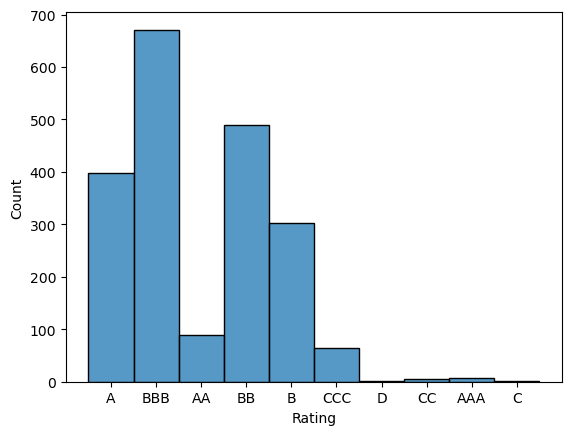

In [8]:
# 3.2

sns.histplot(data=df, x="Rating")

In [10]:
df["Rating"] = df["Rating"].replace("AAA", "A")
df["Rating"] = df["Rating"].replace("AA", "A")
df["Rating"] = df["Rating"].replace("BBB", "B")
df["Rating"] = df["Rating"].replace("BB", "B")
df["Rating"] = df["Rating"].replace("CCC", "C")
df["Rating"] = df["Rating"].replace("CC", "C")

<Axes: xlabel='Rating', ylabel='Count'>

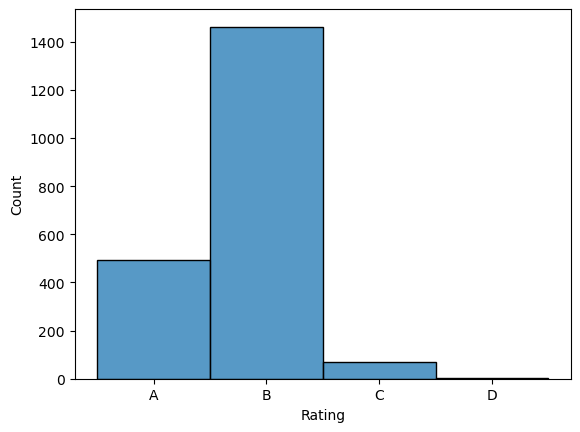

In [11]:
sns.histplot(data=df, x="Rating")

In [24]:
# 3.3

X = df.drop(["Rating", "Date", "Name", "Symbol", "Rating Agency Name", "Sector"], axis=1)
sec = pd.get_dummies(df["Sector"])
X = pd.concat([X, sec], axis = 1)

In [26]:
# 3.4

from sklearn.model_selection import train_test_split

y = df["Rating"]

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

from sklearn import tree 
cart = tree.DecisionTreeClassifier() 
cart = cart.fit(X_train, y_train) 

y_hat = cart.predict(X_test)

# Confusion Matrix
tab = pd.crosstab(y_test,y_hat) 
acc = np.trace(tab)/len(y_test) 
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

# At 70% accuracy, it is okay.

Accuracy:  0.7044334975369458 



col_0,A,B,C
Rating,,,
A,54,41,1
B,56,226,11
C,0,11,6


In [ ]:
# 3.5 

ran = pd.get_dummies(df["Rating Agency Name"])
X = pd.concat([X, ran], axis = 1)

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=104)

from sklearn import tree 
cart = tree.DecisionTreeClassifier() 
cart = cart.fit(X_train, y_train) 

y_hat = cart.predict(X_test)

# Confusion Matrix
tab = pd.crosstab(y_test,y_hat) 
acc = np.trace(tab)/len(y_test) 
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

# The accuracy improves slightly. I think this means that the rating agency does impact what kind 
# of rating the bond will get.

Accuracy:  0.7389162561576355 



col_0,A,B,C
Rating,,,
A,52,43,1
B,43,244,6
C,0,13,4


In [31]:
# End